# MNIST DATASET
## today, we will try to build ANN Multiclass classification algo on MNIST dataset.
## Our motive is to make ANN architecture for beginners ,not to get best accuracy.

In [31]:
# import data, libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential


In [32]:
(x_train,y_train),(x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

In [33]:
x_train.shape

(60000, 28, 28)

In [34]:
y_train.shape

(60000,)

In [35]:
x_test.shape

(10000, 28, 28)

In [36]:
y_test.shape

(10000,)

In [37]:
# x_train[0]

In [38]:
x_train = x_train/255
# x_train[0]

In [39]:
# x_test[0]

In [40]:
x_test = x_test/255
# x_test[0]

In [41]:
# we have lowered all the values in between 0 to 1.

In [45]:
#model training
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # Flatten the size of image from (28*28) to 764.
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
history = model.fit(x_train, y_train, epochs=5, validation_split =0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.1273 - val_accuracy: 0.9764
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0126 - accuracy: 0.9958 - val_loss: 0.1359 - val_accuracy: 0.9748
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.1279 - val_accuracy: 0.9797
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.1384 - val_accuracy: 0.9753
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.1226 - val_accuracy: 0.9787


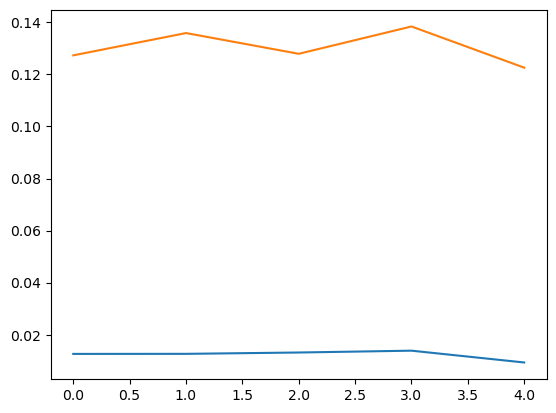

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

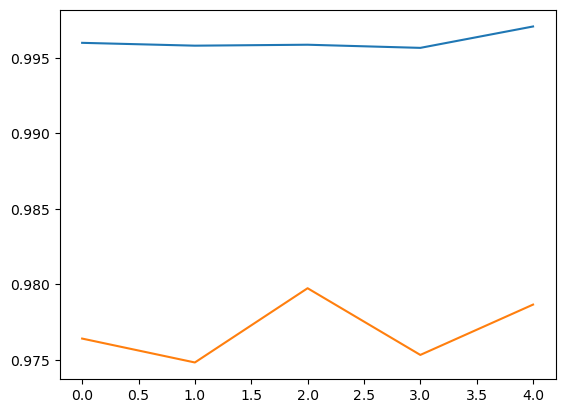

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [60]:
# as from above plot we can clear say that our model is overfitted, 
# but right now our goal is not to make best accuracy model but is to create ann model for multiclass classification.
# further we will learn HOW TO IMPROVE ACCURACY of our model in upcoming days.

In [66]:
#Evaluation 
from sklearn.metrics import accuracy_score

y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis = 1)
y_pred.shape

313/313 [==============================] - 1s 1ms/step


(10000,)

In [68]:
print('Accuracy of our ANN model is:',accuracy_score(y_test, y_pred)*100)

Accuracy of our ANN model is: 97.83


In [69]:
model.save('ann_mnist.h5')